In [2]:
from time import time
import logging

from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [4]:
# Note: run "pip install --upgrade PILLOW" first
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)  # color=False to get 1-d average data, not RGB
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=True)

2017-10-16 00:18:41,018 Loading LFW people faces from /Users/rui/scikit_learn_data/lfw_home


In [5]:
lfw_people

{'DESCR': 'LFW faces dataset',
 'data': array([[ 254.        ,  254.        ,  251.66667175, ...,   87.33333588,
           88.66666412,   86.66666412],
        [  39.66666794,   50.33333206,   47.        , ...,  117.66666412,
          115.        ,  133.66667175],
        [  89.33333588,  104.        ,  126.        , ...,  175.33332825,
          183.33332825,  183.        ],
        ..., 
        [  86.        ,   80.33333588,   74.66666412, ...,   44.        ,
           49.66666794,   44.66666794],
        [  50.33333206,   65.66666412,   88.        , ...,  197.        ,
          179.33332825,  166.33332825],
        [  30.        ,   27.        ,   32.66666794, ...,   35.        ,
           35.33333206,   61.        ]], dtype=float32),
 'images': array([[[ 254.        ,  254.        ,  251.66667175, ...,   65.33333588,
            50.66666794,   40.33333206],
         [ 253.33332825,  251.33332825,  247.33332825, ...,   66.66666412,
            52.        ,   42.66666794],
    

In [6]:
n_samples, h, w = lfw_people.images.shape
print n_samples, h, w

1288 50 37


In [7]:
np.random.seed(42)

In [8]:
X = lfw_people.data
print X

[[ 254.          254.          251.66667175 ...,   87.33333588
    88.66666412   86.66666412]
 [  39.66666794   50.33333206   47.         ...,  117.66666412  115.
   133.66667175]
 [  89.33333588  104.          126.         ...,  175.33332825
   183.33332825  183.        ]
 ..., 
 [  86.           80.33333588   74.66666412 ...,   44.           49.66666794
    44.66666794]
 [  50.33333206   65.66666412   88.         ...,  197.          179.33332825
   166.33332825]
 [  30.           27.           32.66666794 ...,   35.           35.33333206
    61.        ]]


In [9]:
n_features = X.shape[1]
print n_features

1850


In [10]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print y
print type(target_names), target_names
print n_classes

[5 6 3 ..., 5 3 5]
<type 'numpy.ndarray'> ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
n_components = 150  # F1 0.82
# n_components = 10  # F1 0.48
# n_components = 20  # 
# n_components = 50  # F1 0.81
# n_components = 100  # F1 0.82
# n_components = 250  # F1 0.83
# n_components = 500  # F1 0.75

In [13]:
t0 = time()
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized').fit(X_train)

# from sklearn.decomposition import RandomizedPCA  # deprecated
# pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

print '%0.3f sec' % (time() - t0)

0.442 sec


In [14]:
pca.components_.shape

(150, 1850)

In [15]:
type(pca.components_)

numpy.ndarray

In [16]:
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces

array([[[ -6.85212503e-03,  -7.52696316e-03,  -9.18908981e-03, ...,
          -9.92534842e-03,  -9.24126480e-03,  -9.55196852e-03],
        [ -7.26932226e-03,  -8.41513150e-03,  -1.08215500e-02, ...,
          -1.03958492e-02,  -9.45334599e-03,  -1.00373760e-02],
        [ -8.28028284e-03,  -9.99704204e-03,  -1.27919674e-02, ...,
          -1.14764663e-02,  -9.97210995e-03,  -1.02715026e-02],
        ..., 
        [ -3.57814172e-03,  -3.60919084e-03,  -6.00941428e-03, ...,
          -1.60464406e-02,  -1.44772722e-02,  -1.34908840e-02],
        [ -5.23116278e-03,  -5.11385904e-03,  -6.15798897e-03, ...,
          -1.55621563e-02,  -1.35531324e-02,  -1.25194662e-02],
        [ -6.16342204e-03,  -6.20097921e-03,  -6.66631650e-03, ...,
          -1.43378245e-02,  -1.29418714e-02,  -1.18828959e-02]],

       [[  2.30409124e-02,   2.15520758e-02,   2.27538959e-02, ...,
          -2.10219836e-02,  -2.16403143e-02,  -2.12834063e-02],
        [  2.27003665e-02,   2.19772756e-02,   2.45310770e-0

In [17]:
pca.explained_variance_.shape

(150,)

In [18]:
pca.explained_variance_

array([ 500899.43985528,  391389.07641705,  183402.99060524,
        154097.48903226,  133532.30944886,   74751.08427042,
         65102.29904163,   56350.67271123,   52283.60234243,
         49247.7158758 ,   43554.01774422,   40923.14747078,
         31674.0013929 ,   28167.70295254,   27559.63301573,
         25364.12301342,   23105.02303874,   22132.70810971,
         21637.33602835,   18709.70238292,   18034.81606301,
         16928.94341281,   16558.74655135,   14533.00250193,
         13750.85009622,   13467.21137131,   13138.75493412,
         12536.61476122,   11484.90166322,   10817.99345645,
         10193.37118537,    9883.30592158,    9218.74553458,
          9092.91396698,    8661.95697361,    8542.20791215,
          8145.95145526,    7669.33723601,    7511.87793197,
          7371.72946964,    7249.56536068,    6927.25806233,
          6729.0693175 ,    6690.2301219 ,    6237.61522767,
          6187.78195368,    6094.80857721,    5762.98670894,
          5631.46812751,

In [19]:
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print '%0.3f sec' % (time() - t0)

0.037 sec


In [20]:
X_train_pca.shape

(966, 150)

In [21]:
X_test_pca.shape

(322, 150)

In [22]:
X_train_pca

array([[ -2.07667731e+00,  -1.04633299e+00,   2.12803846e+00, ...,
          6.13584229e-01,  -1.26071787e+00,  -1.69233992e+00],
       [  1.32179396e+00,   5.93143342e-01,   5.34430436e-01, ...,
          2.20781853e-01,  -7.50073805e-04,  -3.46736365e-01],
       [ -7.61586001e-01,  -1.97405029e-02,  -2.40031921e-01, ...,
         -4.05465126e-01,   1.91271369e-01,  -6.80634141e-01],
       ..., 
       [ -7.60706898e-01,   4.02797637e-02,  -2.12562574e-01, ...,
         -9.59764482e-01,  -1.93219879e-01,  -5.06565611e-01],
       [ -2.67559510e-01,   8.39074669e-01,  -2.22312611e-01, ...,
          7.70468507e-01,   1.18848814e+00,   1.77281463e+00],
       [ -1.32024607e+00,  -1.12727962e+00,   1.56249894e-01, ...,
         -7.54382232e-01,  -3.69439619e-01,  -1.37574345e-01]])

In [23]:
t0 = time()
param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_grid,
    n_jobs=-1, # parallel run
)
clf = clf.fit(X_train_pca, y_train)
print '%0.3f sec' % (time() - t0)

10.367 sec


In [24]:
clf.cv_results_

{'mean_fit_time': array([ 0.21879037,  0.23136743,  0.22046828,  0.22633171,  0.28166461,
         0.29972267,  0.17794061,  0.18431369,  0.18989301,  0.29321758,
         0.31239533,  0.33257961,  0.17224367,  0.17522502,  0.17380349,
         0.25981927,  0.26340636,  0.27607266,  0.15878097,  0.15971533,
         0.17009902,  0.25493964,  0.26691477,  0.29781262,  0.15262103,
         0.16313497,  0.24348466,  0.2548217 ,  0.25305796,  0.26544499]),
 'mean_score_time': array([ 0.07255634,  0.06886625,  0.0564727 ,  0.07333732,  0.06655097,
         0.06467032,  0.05060506,  0.05439997,  0.06501969,  0.06475703,
         0.07001273,  0.06680163,  0.05899509,  0.04983934,  0.06251693,
         0.06148736,  0.10550896,  0.05766233,  0.04920268,  0.04905701,
         0.05083156,  0.07029438,  0.0646042 ,  0.06194631,  0.0524327 ,
         0.09019335,  0.10551834,  0.0648489 ,  0.05797768,  0.05596495]),
 'mean_test_score': array([ 0.76293996,  0.77846791,  0.79399586,  0.78467909,  0.62

In [25]:
import pandas as pd
pd.DataFrame(clf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.218790,0.072556,0.762940,1.0,1000,0.0001,"{u'C': 1000.0, u'gamma': 0.0001}",16,0.787037,1.0,0.779503,1.0,0.721875,1.0,0.008808,0.003593,0.029066,0.0
1,0.231367,0.068866,0.778468,1.0,1000,0.0005,"{u'C': 1000.0, u'gamma': 0.0005}",11,0.793210,1.0,0.782609,1.0,0.759375,1.0,0.007563,0.005139,0.014120,0.0
2,0.220468,0.056473,0.793996,1.0,1000,0.001,"{u'C': 1000.0, u'gamma': 0.001}",1,0.808642,1.0,0.776398,1.0,0.796875,1.0,0.032013,0.001380,0.013339,0.0
3,0.226332,0.073337,0.784679,1.0,1000,0.005,"{u'C': 1000.0, u'gamma': 0.005}",6,0.796296,1.0,0.767081,1.0,0.790625,1.0,0.009972,0.011924,0.012657,0.0
4,0.281665,0.066551,0.627329,1.0,1000,0.01,"{u'C': 1000.0, u'gamma': 0.01}",21,0.638889,1.0,0.590062,1.0,0.653125,1.0,0.005748,0.003689,0.026985,0.0
5,0.299723,0.064670,0.397516,1.0,1000,0.1,"{u'C': 1000.0, u'gamma': 0.1}",26,0.395062,1.0,0.397516,1.0,0.400000,1.0,0.009166,0.007183,0.002016,0.0
6,0.177941,0.050605,0.761905,1.0,5000,0.0001,"{u'C': 5000.0, u'gamma': 0.0001}",17,0.787037,1.0,0.779503,1.0,0.718750,1.0,0.007279,0.005968,0.030529,0.0
7,0.184314,0.054400,0.778468,1.0,5000,0.0005,"{u'C': 5000.0, u'gamma': 0.0005}",11,0.793210,1.0,0.782609,1.0,0.759375,1.0,0.010406,0.010592,0.014120,0.0
8,0.189893,0.065020,0.793996,1.0,5000,0.001,"{u'C': 5000.0, u'gamma': 0.001}",1,0.808642,1.0,0.776398,1.0,0.796875,1.0,0.037302,0.005402,0.013339,0.0
9,0.293218,0.064757,0.784679,1.0,5000,0.005,"{u'C': 5000.0, u'gamma': 0.005}",6,0.796296,1.0,0.767081,1.0,0.790625,1.0,0.028296,0.005114,0.012657,0.0


In [26]:
clf.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
clf.best_score_

0.79399585921325055

In [28]:
clf.best_params_

{'C': 1000.0, 'gamma': 0.001}

In [29]:
clf.best_index_

2

In [30]:
clf.scorer_

<function sklearn.metrics.scorer._passthrough_scorer>

In [31]:
clf.n_splits_

3

In [32]:
t0 = time()
y_pred = clf.predict(X_test_pca)
print '%0.3f sec' % (time() - t0)

0.087 sec


In [33]:
print confusion_matrix(y_test, y_pred, labels=range(n_classes))

[[  9   0   3   1   0   0   0]
 [  2  52   1   4   0   1   0]
 [  4   0  22   1   0   0   0]
 [  1  11   2 127   3   1   1]
 [  0   2   0   1  19   1   2]
 [  0   3   0   1   2   8   1]
 [  0   2   1   2   1   0  30]]


In [34]:
print confusion_matrix(y_test, y_pred, labels=range(n_classes)).ravel()

[  9   0   3   1   0   0   0   2  52   1   4   0   1   0   4   0  22   1
   0   0   0   1  11   2 127   3   1   1   0   2   0   1  19   1   2   0
   3   0   1   2   8   1   0   2   1   2   1   0  30]


In [35]:
type(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

numpy.ndarray

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [37]:
accuracy_score(y_test, y_pred)

0.82919254658385089

In [38]:
precision_score(y_test, y_pred, average=None)

array([ 0.5625    ,  0.74285714,  0.75862069,  0.9270073 ,  0.76      ,
        0.72727273,  0.88235294])

In [39]:
recall_score(y_test, y_pred, average=None)

array([ 0.69230769,  0.86666667,  0.81481481,  0.86986301,  0.76      ,
        0.53333333,  0.83333333])

In [40]:
f1_score(y_test, y_pred, average=None)

array([ 0.62068966,  0.8       ,  0.78571429,  0.8975265 ,  0.76      ,
        0.61538462,  0.85714286])

In [41]:
print classification_report(y_test, y_pred, target_names=target_names)

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.74      0.87      0.80        60
  Donald Rumsfeld       0.76      0.81      0.79        27
    George W Bush       0.93      0.87      0.90       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.88      0.83      0.86        36

      avg / total       0.84      0.83      0.83       322



In [42]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [43]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

In [44]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.99, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [45]:
plot_gallery(X_test, prediction_titles, h, w)

In [46]:
eigenface_titles = ['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

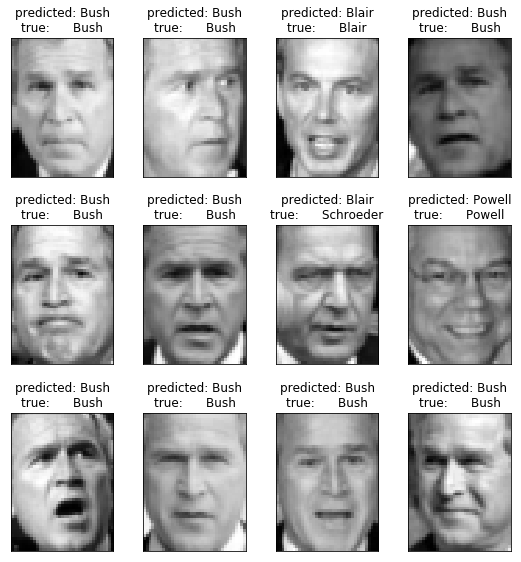

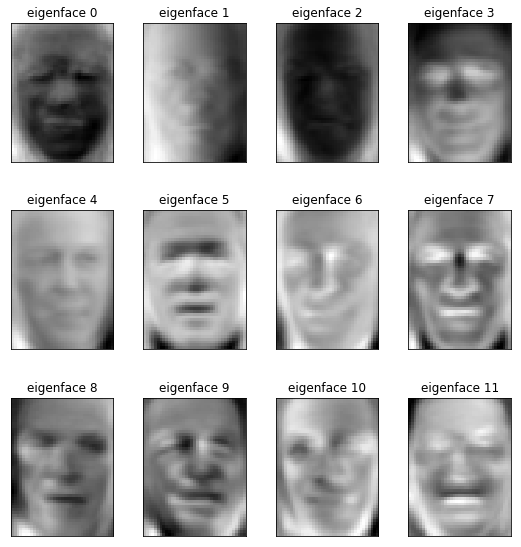

In [47]:
plt.show()